<a href="https://colab.research.google.com/github/audreyemmely/computer-vision/blob/main/visaocomp_lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Resolução Lista 3**
---

ARQUIMEDES VINÍCIUS PEREIRA DE FRANÇA MOURA

AUDREY EMMELY RODRIGUES VASCONCELOS



## Instalação do opencv

In [1]:
#!pip install opencv-python==4.4.0.44
#!pip install opencv-contrib-python==4.4.0.44

## Importando bibliotecas

In [2]:
import numpy as np
import cv2
import skimage
import skimage.filters
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io
%matplotlib inline

## Importando assets

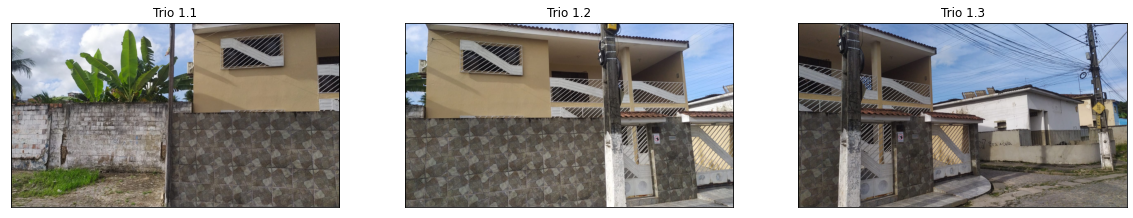

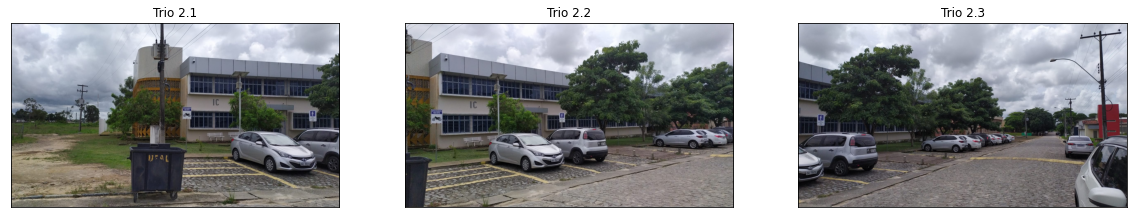

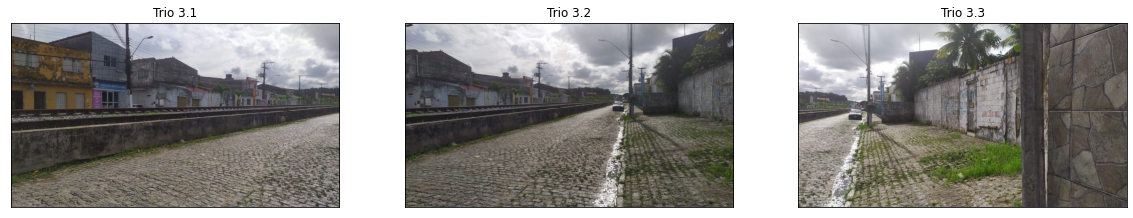

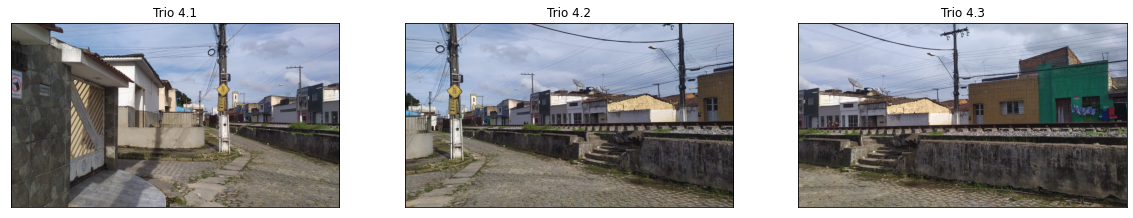

In [3]:
from matplotlib import axes
casa1 = io.imread("https://user-images.githubusercontent.com/52829664/168880772-9007ae6b-9c1e-431d-931f-db0b348787db.jpeg")
casa2 = io.imread("https://user-images.githubusercontent.com/52829664/168880776-feb1b7be-5882-47f8-ab7f-4543b2d8ef3d.jpeg")
casa3 = io.imread("https://user-images.githubusercontent.com/52829664/168880780-85fcaeff-a2e1-4aa8-9e75-e07c534366a8.jpeg")

ic1 = io.imread("https://user-images.githubusercontent.com/25731548/168677180-27390c47-e0dc-4dfe-b4bd-2be8164312b8.jpeg")
ic2 = io.imread("https://user-images.githubusercontent.com/25731548/168677183-b4a4c7f0-86d6-48e4-b255-d03af60e0ce4.jpeg")
ic3 = io.imread("https://user-images.githubusercontent.com/25731548/168677195-a277433d-2c8a-4cfe-a642-c3bb048856e6.jpeg")

lado1 = io.imread("https://user-images.githubusercontent.com/52829664/168882566-7f4ceb42-704d-4a45-bca2-48be64e32a9c.jpeg") 
lado2 = io.imread("https://user-images.githubusercontent.com/52829664/168882569-4d9afaa0-d384-4143-916d-b7426672d501.jpeg")
lado3 = io.imread("https://user-images.githubusercontent.com/52829664/168882570-0a860471-5a25-4549-9851-0c943155dbca.jpeg")

frente1 = io.imread("https://user-images.githubusercontent.com/52829664/168882673-d8f77aeb-b623-45b0-a6eb-bd88cc641c12.jpeg")
frente2 = io.imread("https://user-images.githubusercontent.com/52829664/168882675-17e3a3f6-42a0-436c-bfe5-2ab290981e20.jpeg")
frente3 = io.imread("https://user-images.githubusercontent.com/52829664/168882676-917b649b-acbe-412c-b2de-4811fc23c2d9.jpeg")

imgcasa_1, imgcasa_2, imgcasa_3 = casa1, casa2, casa3
f, axs = plt.subplots(1,3,figsize=(20,20))
axs[0].imshow(casa1)
axs[1].imshow(casa2)
axs[2].imshow(casa3)
plt.sca(axs[0]); plt.imshow(casa1); plt.title('Trio 1.1'); plt.xticks([]); plt.yticks([])
plt.sca(axs[1]); plt.imshow(casa2); plt.title('Trio 1.2'); plt.xticks([]); plt.yticks([])
plt.sca(axs[2]); plt.imshow(casa3); plt.title('Trio 1.3'); plt.xticks([]); plt.yticks([])
plt.show()

imgic_1, imgic_2, imgic_3 = ic1, ic2, ic3
f2, axs2 = plt.subplots(1,3,figsize=(20,20))
axs2[0].imshow(ic1)
axs2[1].imshow(ic2)
axs2[2].imshow(ic3)
plt.sca(axs2[0]); plt.imshow(ic1); plt.title('Trio 2.1'); plt.xticks([]); plt.yticks([])
plt.sca(axs2[1]); plt.imshow(ic2); plt.title('Trio 2.2'); plt.xticks([]); plt.yticks([])
plt.sca(axs2[2]); plt.imshow(ic3); plt.title('Trio 2.3'); plt.xticks([]); plt.yticks([])
plt.show()


imglado_1, imglado_2, imglado_3 = lado1, lado2, lado3
f3, axs3 = plt.subplots(1,3,figsize=(20,20))
axs3[0].imshow(lado1)
axs3[1].imshow(lado2)
axs3[2].imshow(lado3)
plt.sca(axs3[0]); plt.imshow(lado1); plt.title('Trio 3.1'); plt.xticks([]); plt.yticks([])
plt.sca(axs3[1]); plt.imshow(lado2); plt.title('Trio 3.2'); plt.xticks([]); plt.yticks([])
plt.sca(axs3[2]); plt.imshow(lado3); plt.title('Trio 3.3'); plt.xticks([]); plt.yticks([])
plt.show()

imgfrente_1, imgfrente_2, imgfrente_3 = frente1, frente2, frente3
f4, axs4 = plt.subplots(1,3,figsize=(20,20))
axs4[0].imshow(frente1)
axs4[1].imshow(frente2)
axs4[2].imshow(frente3)
plt.sca(axs4[0]); plt.imshow(frente1); plt.title('Trio 4.1'); plt.xticks([]); plt.yticks([])
plt.sca(axs4[1]); plt.imshow(frente2); plt.title('Trio 4.2'); plt.xticks([]); plt.yticks([])
plt.sca(axs4[2]); plt.imshow(frente3); plt.title('Trio 4.3'); plt.xticks([]); plt.yticks([])
plt.show()

## Questão 1

Escolha uma das metodologias que você implementou na segunda lista para gerar correspondências entre um par de imagens. Aplique-as em 5 pares de imagens, calcule homografias e aplique para gerar panoramas entre os pares de imagens (um panorama por par). Dica: use a função warpPerspective do OpenCv.


In [4]:
def siftComputeFunction(img):
  image1_copy = img.copy()
  gray = cv2.cvtColor(image1_copy,cv2.COLOR_BGR2GRAY)
  sift = cv2.SIFT_create()
  kp,des = sift.detectAndCompute(gray,None)
  
  return kp,des

def flannMatcher(img1, img2):
  MIN_MATCH_COUNT = 5
  kp1,des1 = siftComputeFunction(img1)
  kp2,des2 = siftComputeFunction(img2)

  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)   # or pass empty dictionary
  flann = cv2.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des1,des2,k=2)
  
  # store all the good matches as per Lowe's ratio test.
  good = []
  for m,n in matches:
      if m.distance < 0.7*n.distance:
          good.append(m)
  if len(good)>MIN_MATCH_COUNT:
      src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
      dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
      M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
      matchesMask = mask.ravel().tolist()
      h,w,d = img1.shape
      pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
      dst = cv2.perspectiveTransform(pts,M)
      img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
  else:
      print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
      matchesMask = None
      return np.zeros_like(img1)
  
  result = cv2.warpPerspective(img1, M,
                               (img1.shape[1] + img2.shape[1], img1.shape[0]))
  result[0:img2.shape[0], 0:img2.shape[1]] = img2
  return result

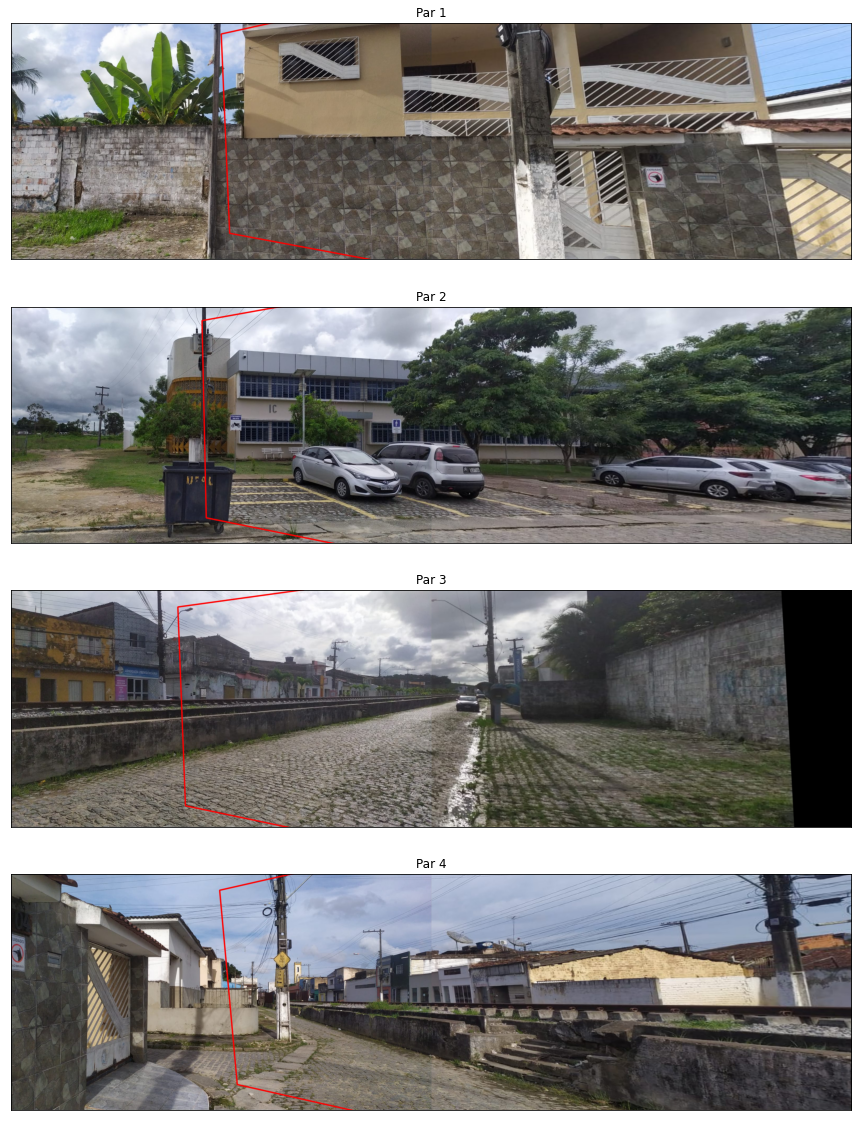

In [5]:
result1 = flannMatcher(imgcasa_2,imgcasa_1)
result2 = flannMatcher(imgic_2,imgic_1)
result3 = flannMatcher(imglado_2,imglado_1)
result4 = flannMatcher(imgfrente_2,imgfrente_1)

f, axs = plt.subplots(4,1,figsize=(20,20))
axs[0].imshow(result1)
axs[1].imshow(result2)
axs[2].imshow(result3)
axs[3].imshow(result4)
plt.sca(axs[0]); plt.imshow(result1); plt.title('Par 1'); plt.xticks([]); plt.yticks([])
plt.sca(axs[1]); plt.imshow(result2); plt.title('Par 2'); plt.xticks([]); plt.yticks([])
plt.sca(axs[2]); plt.imshow(result3); plt.title('Par 3'); plt.xticks([]); plt.yticks([])
plt.sca(axs[3]); plt.imshow(result4); plt.title('Par 4'); plt.xticks([]); plt.yticks([])
plt.show()


## Questão 2

Repita a questão anterior com 5 trios de imagens, alinhando as imagens no plano da primeira imagem. Repita o mesmo alinhando no plano da segunda imagem, e da terceira imagem. Note que aqui será necessário compor as transoformações de homografia em alguns casos, ou calcular inversas.


### IMAGEM 01

In [6]:
def siftComputeFunction(img):
  image1_copy = img.copy()
  gray = cv2.cvtColor(image1_copy,cv2.COLOR_BGR2GRAY)
  sift = cv2.SIFT_create()
  kp,des = sift.detectAndCompute(gray,None)
  
  return kp,des

def flannMatcherTrio(img1, img2, img3):
  MIN_MATCH_COUNT = 5
  kp1,des1 = siftComputeFunction(img1)
  kp2,des2 = siftComputeFunction(img2)

  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)   # or pass empty dictionary
  flann = cv2.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des2,des1,k=2)
  
  # store all the good matches as per Lowe's ratio test.
  good = []
  for m,n in matches:
      if m.distance < 0.7*n.distance:
          good.append(m)
  if len(good)>MIN_MATCH_COUNT:
      src_pts = np.float32([ kp2[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
      dst_pts = np.float32([ kp1[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
      M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
      matchesMask = mask.ravel().tolist()
      h,w,d = img2.shape
      pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
      dst = cv2.perspectiveTransform(pts,M)
      img1Borded = cv2.polylines(img1.copy(),[np.int32(dst)],True,255,3, cv2.LINE_AA)
  else:
      print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
      matchesMask = None
      return np.zeros_like(img1)
  
  result = cv2.warpPerspective(img2, M,
                               (img1.shape[1] + img2.shape[1], img2.shape[0]))
  result[0:img1.shape[0], 0:img1.shape[1]] = img1
  
  kpRes,desRes = siftComputeFunction(result)
  kp3,des3 = siftComputeFunction(img3)

  matches = flann.knnMatch(des3,desRes,k=2)
  
  # store all the good matches as per Lowe's ratio test.
  good = []
  for m,n in matches:
      if m.distance < 0.7*n.distance:
          good.append(m)
  if len(good)>MIN_MATCH_COUNT:
      src_pts = np.float32([ kp3[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
      dst_pts = np.float32([ kpRes[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
      M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
      matchesMask = mask.ravel().tolist()
      h,w,d = img3.shape
      pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
      dst = cv2.perspectiveTransform(pts,M)
      imgResultBorded = cv2.polylines(result.copy(),[np.int32(dst)],True,255,3, cv2.LINE_AA)
  else:
      print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
      matchesMask = None
      return np.zeros_like(img1)
  
  result2 = cv2.warpPerspective(img3, M,
                               (result.shape[1] + img3.shape[1], img3.shape[0]))
  
  result2[0:img1.shape[0], 0:img1.shape[1]] = img1Borded
  return result2

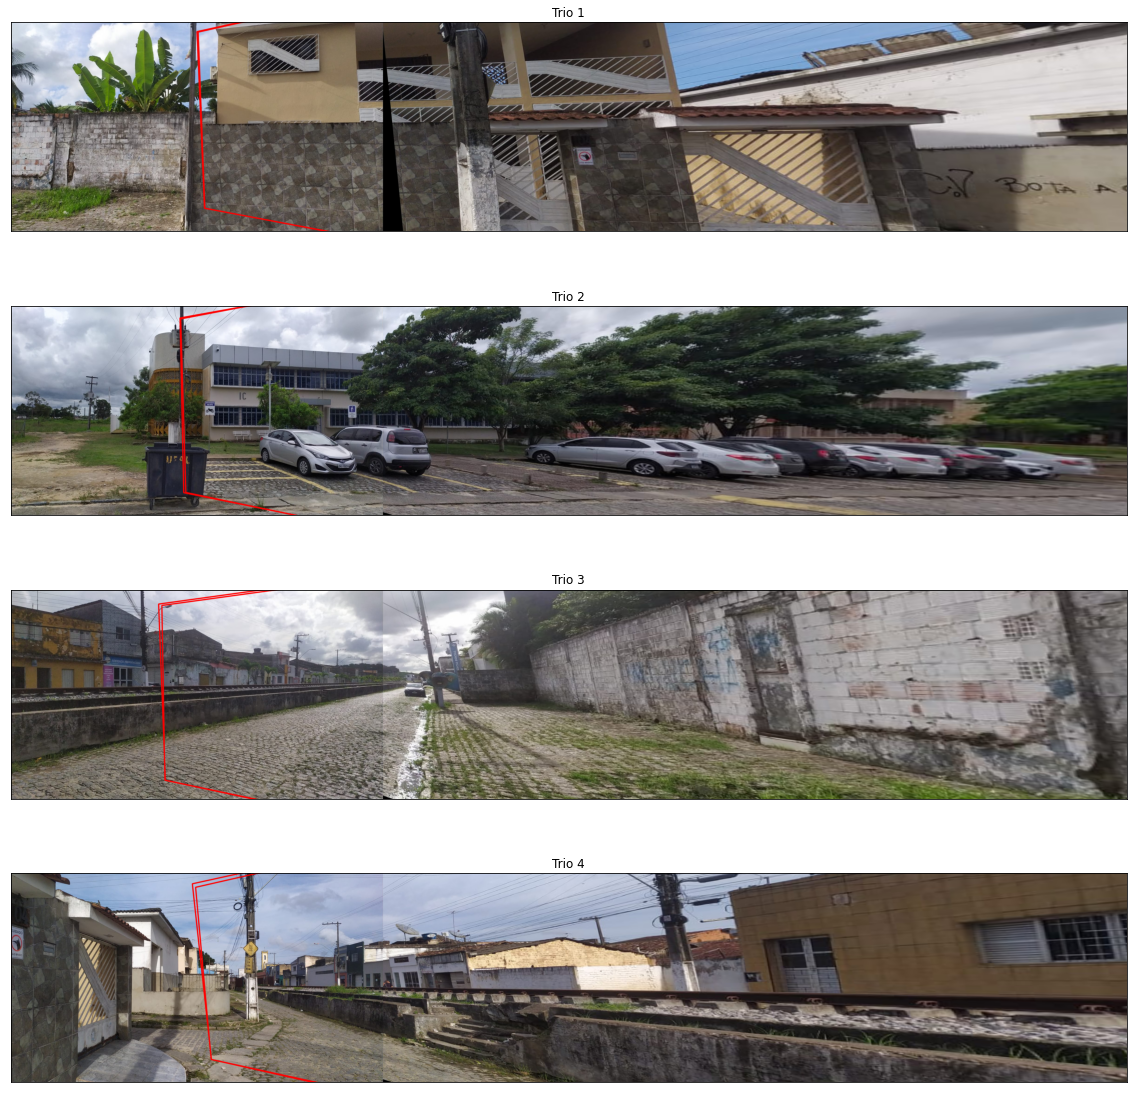

In [7]:
result1 = flannMatcherTrio(imgcasa_1,imgcasa_2,imgcasa_3)
result2 = flannMatcherTrio(imgic_1,imgic_2,imgic_3)
result3 = flannMatcherTrio(imglado_1,imglado_2,imglado_3)
result4 = flannMatcherTrio(imgfrente_1,imgfrente_2,imgfrente_3)

f, axs = plt.subplots(4,1,figsize=(20,20))
axs[0].imshow(result1)
axs[1].imshow(result2)
axs[2].imshow(result3)
axs[3].imshow(result4)
plt.sca(axs[0]); plt.imshow(result1); plt.title('Trio 1'); plt.xticks([]); plt.yticks([])
plt.sca(axs[1]); plt.imshow(result2); plt.title('Trio 2'); plt.xticks([]); plt.yticks([])
plt.sca(axs[2]); plt.imshow(result3); plt.title('Trio 3'); plt.xticks([]); plt.yticks([])
plt.sca(axs[3]); plt.imshow(result4); plt.title('Trio 4'); plt.xticks([]); plt.yticks([])
plt.show()

### IMAGEM 02

In [8]:
def flannMatcherTrio_2_flipped(img1, img2, img3):
  result1 = flannMatcher(img3, img2)
  result1 = cv2.flip(result1, -1)
  img1 = cv2.flip(img1, -1)
  result2 = flannMatcher(img1, result1)
  result2 = cv2.flip(result2, -1)
  return result2

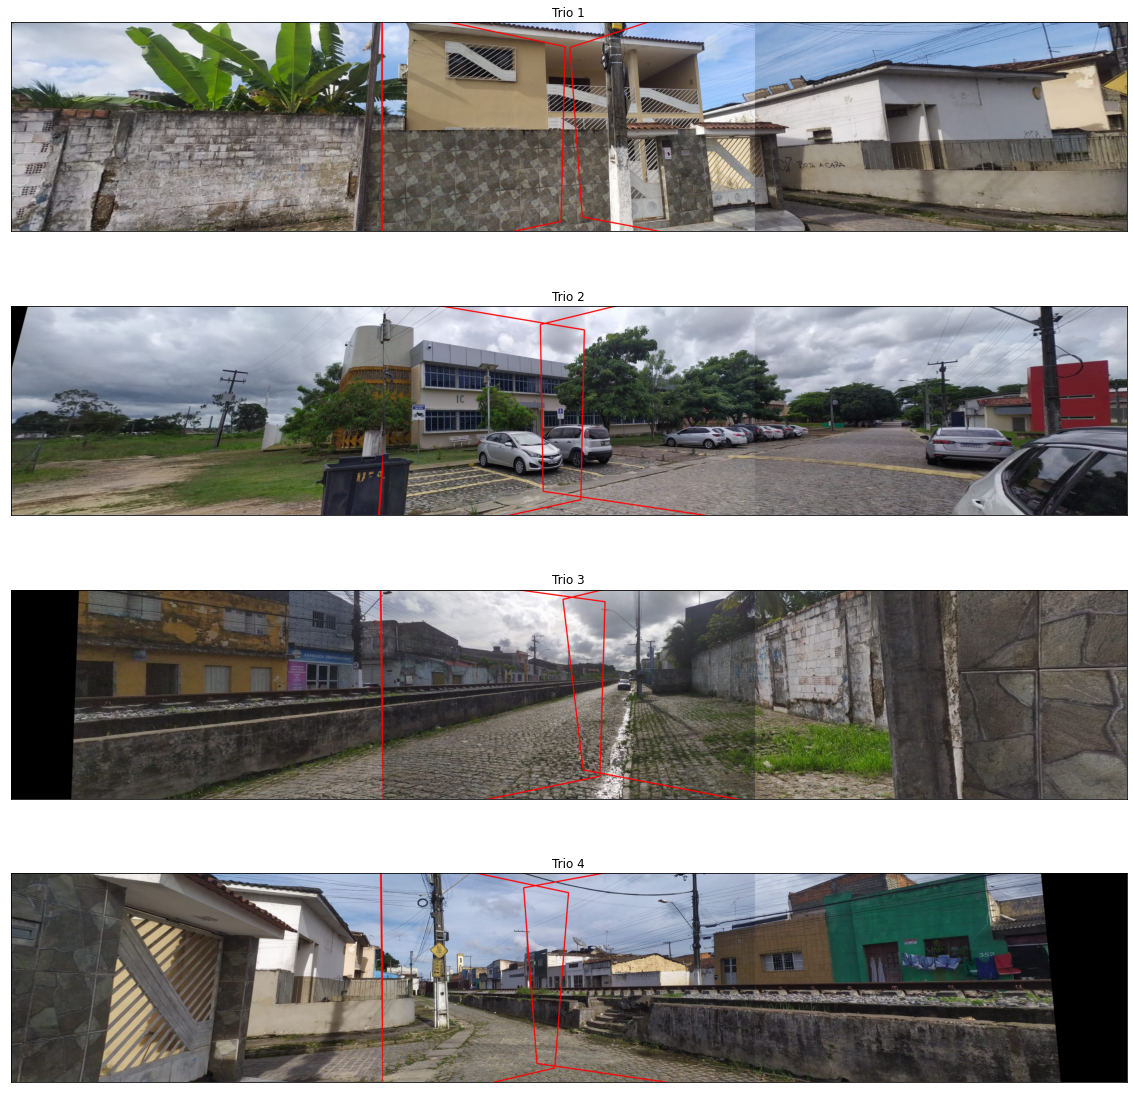

In [9]:
result1 = flannMatcherTrio_2_flipped(imgcasa_1,imgcasa_2,imgcasa_3)
result2 = flannMatcherTrio_2_flipped(imgic_1, imgic_2, imgic_3)
result3 = flannMatcherTrio_2_flipped(imglado_1,imglado_2,imglado_3)
result4 = flannMatcherTrio_2_flipped(imgfrente_1,imgfrente_2,imgfrente_3)

f, axs = plt.subplots(4,1,figsize=(20,20))
axs[0].imshow(result1)
axs[1].imshow(result2)
axs[2].imshow(result3)
axs[3].imshow(result4)
plt.sca(axs[0]); plt.imshow(result1); plt.title('Trio 1'); plt.xticks([]); plt.yticks([])
plt.sca(axs[1]); plt.imshow(result2); plt.title('Trio 2'); plt.xticks([]); plt.yticks([])
plt.sca(axs[2]); plt.imshow(result3); plt.title('Trio 3'); plt.xticks([]); plt.yticks([])
plt.sca(axs[3]); plt.imshow(result4); plt.title('Trio 4'); plt.xticks([]); plt.yticks([])
plt.show()

### IMAGEM 03

In [10]:
def flannMatcherTrio_3_flipped(img1, img2, img3):
  img1 = cv2.flip(img1, -1)
  img2 = cv2.flip(img2, -1)
  img3 = cv2.flip(img3, -1)
  
  result = flannMatcherTrio(img3, img2, img1)
  result = cv2.flip(result, -1)
  return result

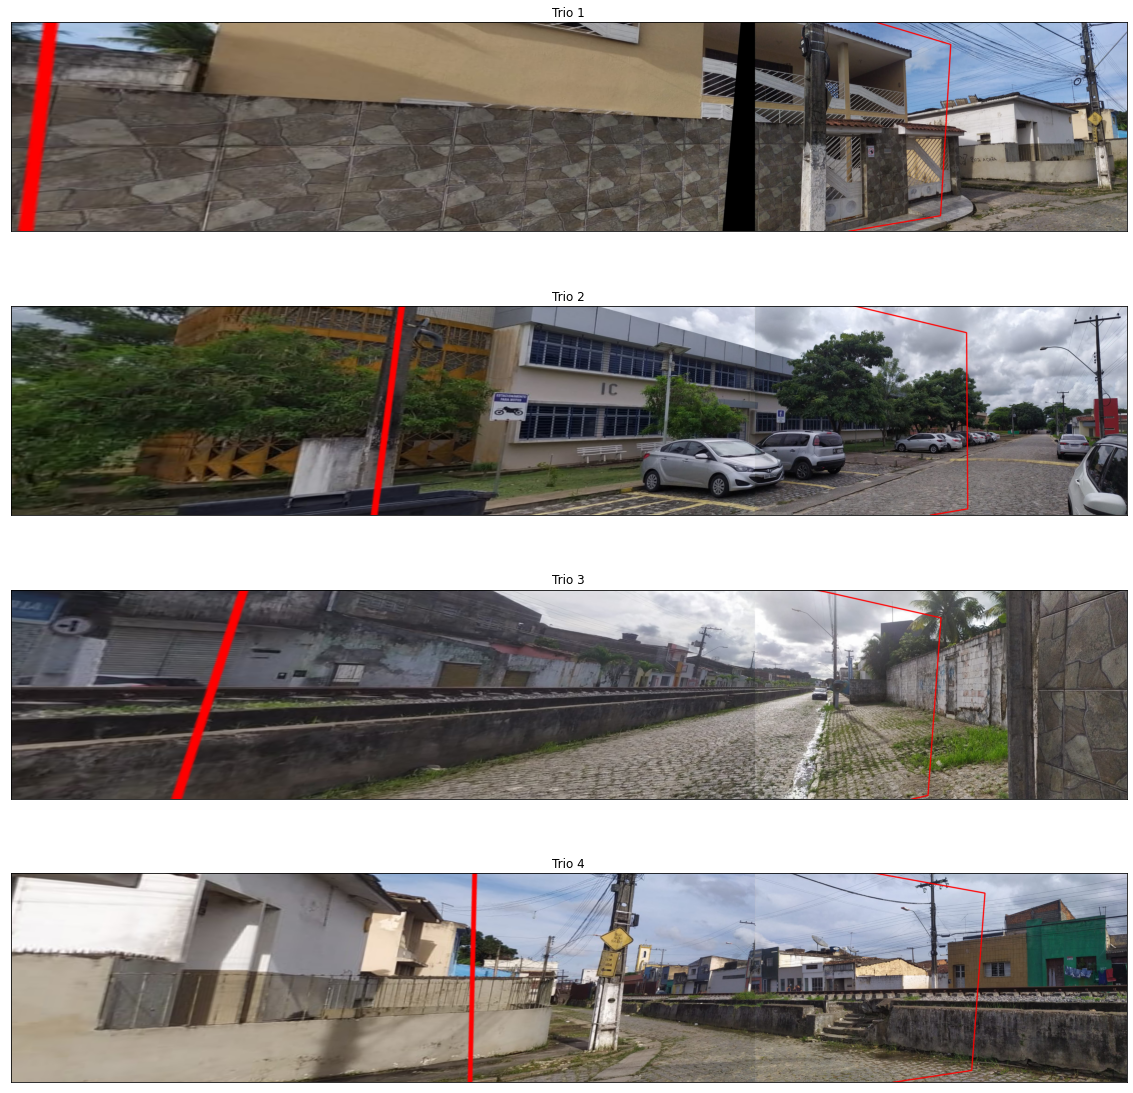

In [11]:
result1 = flannMatcherTrio_3_flipped(imgcasa_1,imgcasa_2,imgcasa_3)
result2 = flannMatcherTrio_3_flipped(imgic_1, imgic_2, imgic_3)
result3 = flannMatcherTrio_3_flipped(imglado_1,imglado_2,imglado_3)
result4 = flannMatcherTrio_3_flipped(imgfrente_1,imgfrente_2,imgfrente_3)

f, axs = plt.subplots(4,1,figsize=(20,20))
axs[0].imshow(result1)
axs[1].imshow(result2)
axs[2].imshow(result3)
axs[3].imshow(result4)
plt.sca(axs[0]); plt.imshow(result1); plt.title('Trio 1'); plt.xticks([]); plt.yticks([])
plt.sca(axs[1]); plt.imshow(result2); plt.title('Trio 2'); plt.xticks([]); plt.yticks([])
plt.sca(axs[2]); plt.imshow(result3); plt.title('Trio 3'); plt.xticks([]); plt.yticks([])
plt.sca(axs[3]); plt.imshow(result4); plt.title('Trio 4'); plt.xticks([]); plt.yticks([])
plt.show()